In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Set data folder path
DATA_PATH = "../data/"

In [16]:
# Load metadata
products = pd.read_csv(os.path.join(DATA_PATH, "products.csv"))
aisles = pd.read_csv(os.path.join(DATA_PATH, "aisles.csv"))
departments = pd.read_csv(os.path.join(DATA_PATH, "departments.csv"))


In [17]:
# Load order-level data
orders = pd.read_csv(os.path.join(DATA_PATH, "orders.csv"))
order_products_prior = pd.read_csv(os.path.join(DATA_PATH, "order_products__prior.csv"))
order_products_train = pd.read_csv(os.path.join(DATA_PATH, "order_products__train.csv"))

### 🔍 Preview data

In [18]:
print("Products:")
display(products.head())

Products:


product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [19]:
print("\nOrders:")
display(orders.head())


Orders:


order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [20]:
print("\nPrior Order-Product Interactions:")
display(order_products_prior.head())


Prior Order-Product Interactions:


order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

### 📊 Exploratory Data Analysis (EDA)

In [22]:
# Merge order-product-prior with orders
order_prior_merged = order_products_prior.merge(orders, on='order_id', how='left')

In [31]:
# Reorder ratio overall
reorder_ratio = order_prior_merged['reordered'].mean()
print(f"Overall reorder ratio: {reorder_ratio:.2f}")

Overall reorder ratio: 0.59


In [24]:
# Most frequently ordered products
top_products = order_prior_merged['product_id'].value_counts().head(10).reset_index()
top_products.columns = ['product_id', 'order_count']
top_products = top_products.merge(products, on='product_id', how='left')
display(top_products)

product_id  order_count            product_name  aisle_id  department_id
0       24852       472565                  Banana        24              4
1       13176       379450  Bag of Organic Bananas        24              4
2       21137       264683    Organic Strawberries        24              4
3       21903       241921    Organic Baby Spinach       123              4
4       47209       213584    Organic Hass Avocado        24              4
5       47766       176815         Organic Avocado        24              4
6       47626       152657             Large Lemon        24              4
7       16797       142951            Strawberries        24              4
8       26209       140627                   Limes        24              4
9       27845       137905      Organic Whole Milk        84             16

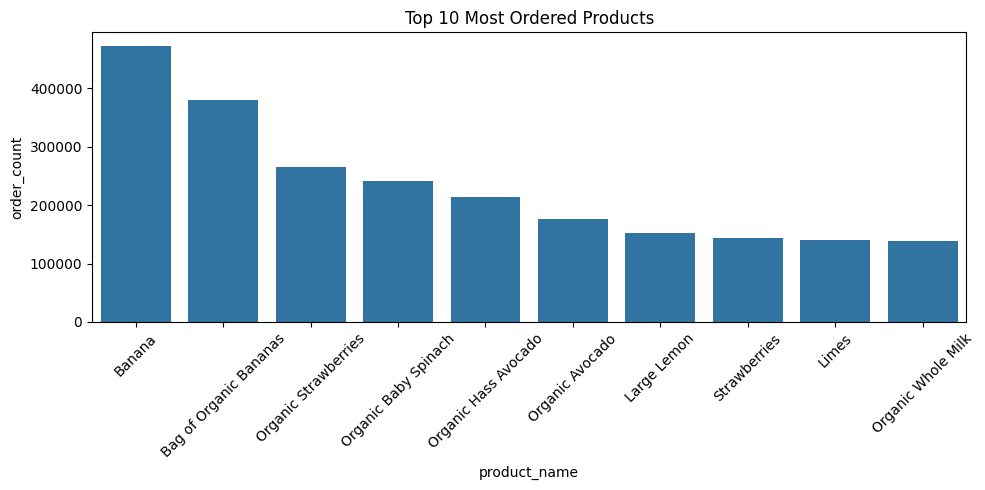

In [27]:
# Plot top products
plt.figure(figsize=(10, 5))
sns.barplot(x='product_name', y='order_count', data=top_products)
plt.title("Top 10 Most Ordered Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Products with highest reorder probability
reorder_prob = order_prior_merged.groupby('product_id')['reordered'].mean().sort_values(ascending=False)
top_reordered = reorder_prob.head(10).reset_index().merge(products, on='product_id')
display(top_reordered)

product_id  reordered                              product_name  aisle_id  \
0        6433   0.941176                       Raw Veggie Wrappers        13   
1        2075   0.931034  Serenity Ultimate Extrema Overnight Pads       126   
2       43553   0.923077                       Orange Energy Shots        64   
3       27740   0.920792                        Chocolate Love Bar        45   
4       14609   0.914286                 Soy Powder Infant Formula        92   
5       13875   0.911111          Simply Sleep Nighttime Sleep Aid         6   
6       39992   0.909091                 Energy Shot, Grape Flavor        64   
7       31418   0.900000                            Sparking Water       115   
8        5868   0.900000   Russian River Valley Reserve Pinot Noir        28   
9       35604   0.900000                           Maca Buttercups        45   

   department_id  
0             20  
1             11  
2              7  
3             19  
4             18  
5              2  
6              7  
7              7  
8              5  
9             19

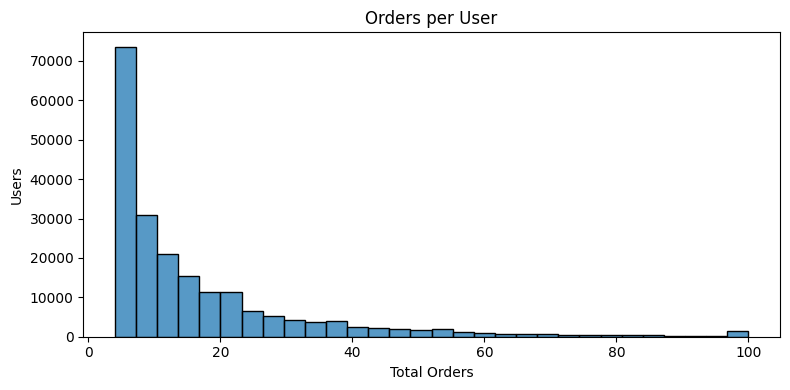

In [30]:
# Orders per user
orders_per_user = orders.groupby('user_id')['order_number'].max()
plt.figure(figsize=(8, 4))
sns.histplot(orders_per_user, bins=30, kde=False)
plt.title("Orders per User")
plt.xlabel("Total Orders")
plt.ylabel("Users")
plt.tight_layout()
plt.show()

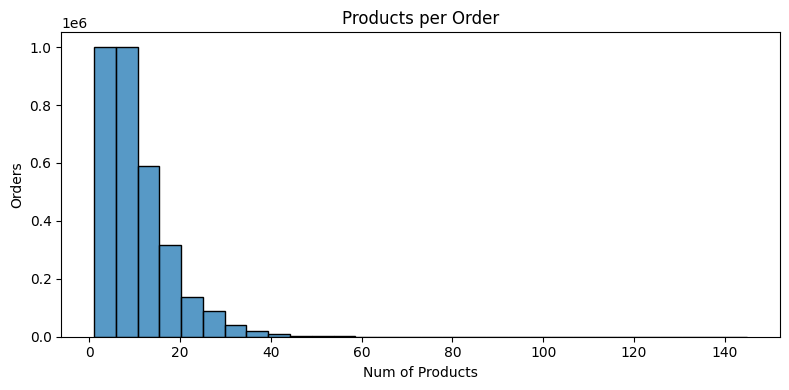

In [32]:
# Products per order
products_per_order = order_products_prior.groupby('order_id')['product_id'].count()
plt.figure(figsize=(8, 4))
sns.histplot(products_per_order, bins=30, kde=False)
plt.title("Products per Order")
plt.xlabel("Num of Products")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()

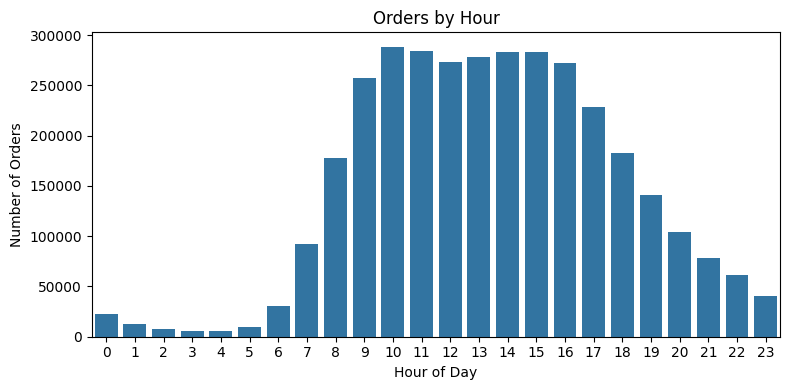

In [34]:
# Ordering by hour
plt.figure(figsize=(8, 4))
sns.countplot(x='order_hour_of_day', data=orders)
plt.title("Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


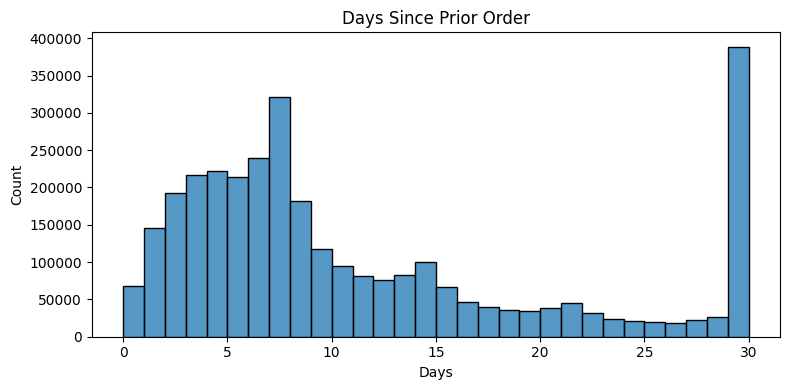

In [35]:
# Days since prior order
plt.figure(figsize=(8, 4))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30)
plt.title("Days Since Prior Order")
plt.xlabel("Days")
plt.tight_layout()
plt.show()